In [1]:
import numpy as np
# %matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt

# Симплектичность
Посмотрим, какие методы могут сохранять полную энергию динамической системы

Возьмём для этого обычный себе осциллятор, x''=-x. Начинает с (x=1, v=0)

In [2]:
def f(x):
    return -x

In [3]:
# Метод Эйлера
def euler(x0, v0, ts):
    xs, vs = [x0], [v0]

    for i in range(len(ts)-1):
        dt = ts[i+1] - ts[i]
        x1, v1 = xs[-1]+vs[-1]*dt, vs[-1]+f(xs[-1])*dt
        xs.append(x1)
        vs.append(v1)
    
    return xs, vs

# Метод Верле. Использует v0 только на первом шаге, дальше сам
def verlet(x0, v0, ts):
    xs, vs = [x0], [v0]
    dt = ts[1] - ts[0]
    
    x1 = x0 + v0*dt + f(x0)*dt**2/2
    xs.append(x1)
    
    for i in range(1, len(ts)-1):
        dt = ts[i+1] - ts[i]
        x1 = 2*xs[-1] - xs[-2] + f(xs[-1])*dt**2
        xs.append(x1)

    for i in range(1, len(ts)-1):
        dt = ts[i+1] - ts[i]
        vs.append((xs[i+1]-xs[i-1])/2/dt)

    vs.append((xs[-1]-xs[-2])/dt)
  
    return xs, vs

# Метод Рунге-Кутты 4-го порядка
def rk4(x0, v0, ts):
    xs, vs = [x0], [v0]

    for i in range(len(ts)-1):
        dt = ts[i+1] - ts[i]
        x, v = xs[-1], vs[-1]
        kx1 = dt*(v)
        kv1 = dt*(f(x))
        kx2 = dt*(v+kv1/2)
        kv2 = dt*(f(x+kx1/2))
        kx3 = dt*(v+kv2/2)
        kv3 = dt*(f(x+kx2/2))
        kx4 = dt*(v+kv3)
        kv4 = dt*(f(x+kx3))
        x1 = x + (kx1+2*kx2+2*kx3+kx4)/6
        v1 = v + (kv1+2*kv2+2*kv3+kv4)/6
        xs.append(x1)
        vs.append(v1)
    
    return xs, vs

In [4]:
x0, v0 = 1, 0
t0, t1 = 0, 1000*np.pi
n = 10001

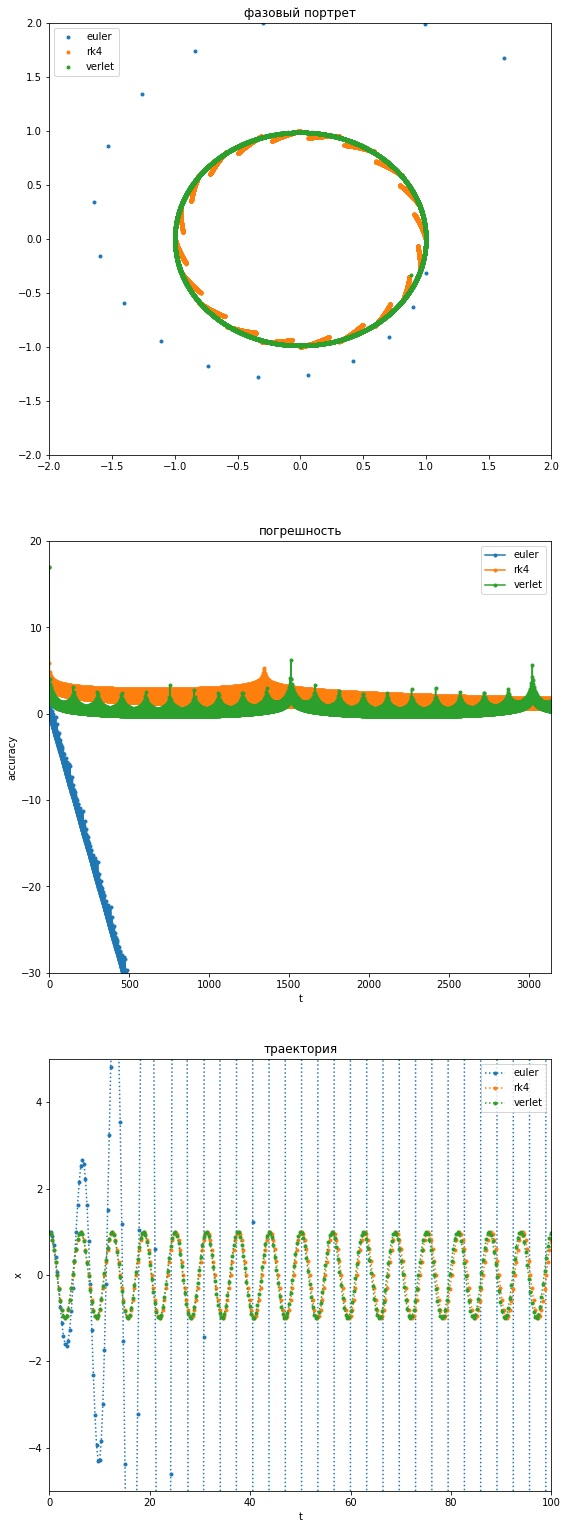

In [5]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(9, 27))

# reference line
ts = np.linspace(0, 2*np.pi, 101)
ax1.plot(np.cos(ts), np.sin(ts), 'k:')

# solvers
ts = np.linspace(t0, t1, n)
for method in ['euler', 'rk4', 'verlet']:
    xs, vs = locals()[method](x0, v0, ts)
    ax1.plot(xs, vs, '.', label=method)
    ax2.plot(ts, -np.log10(np.clip(np.abs(np.array(xs) - np.cos(ts)), 1e-17, np.inf)), '.-', label=method)
    ax3.plot(ts, xs, '.:', label=method)

ax1.legend()
ax1.axis([-2, 2, -2, 2])
ax1.set_title('фазовый портрет')

ax2.legend()
ax2.axis([t0, t1, -30, 20])
ax2.set_xlabel('t')
ax2.set_ylabel('accuracy')
ax2.set_title('погрешность')

ax3.legend()
ax3.axis([t0, t0+100, -5, 5])
ax3.set_xlabel('t')
ax3.set_ylabel('x')
ax3.set_title('траектория')
pass

Метод Эйлера улетел, РК4 тоже исподволь съезжает.

А Верле, хотя и даёт ошибку больше, чем РК4, сидит себе на фазовом круге и сидит! 